# Models built for data prediction

In [1]:
from _Setup import *

In [2]:
# Import Data
train = pd.read_csv(missForestTrainFile)
test = pd.read_csv(missForestTestFile)

In [ ]:
X_train = train.drop(["SepsisLabel", "Unit2", "HospAdmTime", "Unnamed: 0"], axis = 1)
y_train = train['SepsisLabel']

In [ ]:
test = test.drop(["Unit2", "HospAdmTime", "Unnamed: 0"], axis = 1)


KeyError: "['Unit2', 'HospAdmTime', 'Unnamed: 0'] not found in axis"

In [73]:
test.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,...,Hct,Hgb,WBC,Platelets,Age,patient,time,Gender,Unit1,ICULOS
0,1.351967,0.277806,0.958638,0.042737,-0.253824,-0.367124,-0.553534,0.029974,0.002541,0.141602,...,-0.764828,-0.804497,-0.571821,-0.764641,1.194123,6560,1,1.0,1.0,2.0
1,0.961676,-0.351134,0.958638,-0.942583,-0.766278,-0.618962,-0.553534,0.023291,0.001528,0.153359,...,-0.764828,-0.804497,-0.571821,-0.764641,1.194123,6560,2,1.0,1.0,3.0
2,1.073188,-0.351134,0.958638,0.085577,-0.397163,-0.495095,-0.553534,0.023291,0.000341,0.153359,...,-0.764828,-0.804497,-0.571821,-0.764641,1.194123,6560,3,1.0,1.0,4.0
3,1.798014,-0.980075,0.958638,1.156578,0.771701,0.492840,-0.553534,0.023291,-0.000921,0.153359,...,-0.764828,-0.804497,-0.571821,-0.764641,1.194123,6560,4,1.0,1.0,5.0
4,0.738653,-0.980075,0.742060,-1.071103,-1.115092,-0.920549,-0.553534,0.023291,-0.001937,0.153359,...,-0.764828,-0.804497,-0.571821,-0.764641,1.194123,6560,5,1.0,1.0,6.0


In [4]:
X_train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,...,Hct,Hgb,WBC,Platelets,Age,patient,time,Gender,Unit1,ICULOS
0,-0.432220,0.749512,-2.124421,-0.621283,0.146051,0.420292,-1.294263,0.045536,0.073114,0.340467,...,0.422033,0.740608,0.373687,-0.431184,-0.299413,16426,1,1.0,0.0,1.0
1,-0.432220,0.749512,-2.124421,-0.621283,0.146051,0.420292,-1.294263,0.045536,0.073114,0.340467,...,0.422033,0.740608,0.373687,-0.431184,-0.299413,16426,2,1.0,0.0,2.0
2,-0.320708,0.592277,-0.914129,-0.428503,0.299849,0.716228,-1.294263,0.045536,-0.000054,0.710267,...,0.422033,0.740608,0.373687,-0.431184,-0.299413,16426,3,1.0,0.0,3.0
3,-0.376464,0.906747,-0.531932,-0.471343,0.053772,0.346308,-1.294263,-0.768098,-0.000054,-0.029333,...,0.422033,0.740608,0.373687,-0.431184,-0.299413,16426,4,1.0,0.0,4.0
4,-0.710999,0.906747,-0.531932,-0.342823,-0.130785,0.050372,-1.479445,-0.768098,-0.014687,-0.029333,...,0.422033,0.740608,0.373687,-0.431184,-0.299413,16426,5,1.0,0.0,5.0


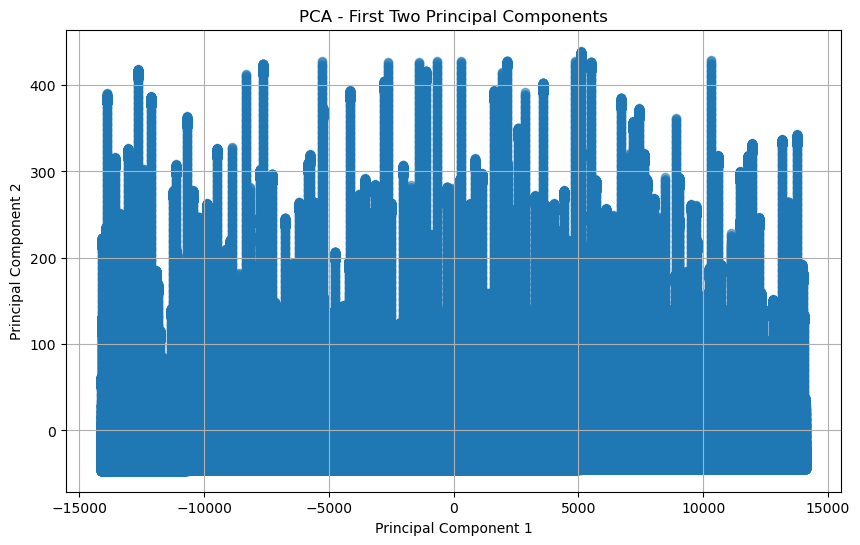

In [5]:
# Transform the data using the first two principal components
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(X_train)

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_data[:, 0], pca_2d_data[:, 1], alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()



In [6]:
# Get the PCA components (loadings)
# loadings = pca.components_
# 
# # Create a DataFrame for the loadings
# loadings_df = pd.DataFrame(loadings, columns=X_train.columns)
# 
# # Set pandas options to display floats in a more readable format
# pd.set_option('display.float_format', lambda x: '%.6f' % x)
# 
# # Get the loadings for the first principal component
# first_pc_loadings = loadings_df.iloc[0]
# 
# 
# # Display the loadings for the first principal component separately (optional)
# print("\nLoadings for the First Principal Component:")
# print(first_pc_loadings)

In [7]:
# from linearmodels.panel import PanelOLS
# import statsmodels.api as sm
# 
# # Set the multi-index for your panel data
# df = resampled_train.set_index(['patient', 'time'])
# 
# # Prepare the dependent variable (y) and independent variables (X)
# X = df[['Glucose', 'Fibrinogen', 'Bilirubin_total']]  # Remove 'Age' if it does not vary within entities
# X = sm.add_constant(X)  # Add a constant term
# 
# y = df['SepsisLabel']  # Your binary dependent variable
# 
# # Combine y and X into a single DataFrame for the formula
# df_combined = X.copy()
# df_combined['SepsisLabel'] = y
# 
# # Fit the model using the fixed effects estimator
# model = PanelOLS.from_formula('SepsisLabel ~ Glucose + Fibrinogen + Bilirubin_total + EntityEffects', data=df_combined)
# 
# # Get the results without drop_absorbed
# results = model.fit()
# 
# # Display the results
# print(results)



In [8]:
X_train_ydf = train.drop(["Unit2", "HospAdmTime", "Unnamed: 0"], axis = 1)
X_train_ydf['SepsisLabel'] = X_train_ydf['SepsisLabel'].astype(int)
ydf_model = ydf.GradientBoostedTreesLearner(label='SepsisLabel').train(X_train_ydf, verbose = 2)

Train model on 1389147 examples
Model trained in 0:04:05.847753


In [9]:
ydf_model.describe()

In [61]:
X_train_ydf.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,...,Hgb,WBC,Platelets,Age,patient,time,Gender,Unit1,ICULOS,SepsisLabel
0,-0.432220,0.749512,-2.124421,-0.621283,0.146051,0.420292,-1.294263,0.045536,0.073114,0.340467,...,0.740608,0.373687,-0.431184,-0.299413,16426,1,1.0,0.0,1.0,0
1,-0.432220,0.749512,-2.124421,-0.621283,0.146051,0.420292,-1.294263,0.045536,0.073114,0.340467,...,0.740608,0.373687,-0.431184,-0.299413,16426,2,1.0,0.0,2.0,0
2,-0.320708,0.592277,-0.914129,-0.428503,0.299849,0.716228,-1.294263,0.045536,-0.000054,0.710267,...,0.740608,0.373687,-0.431184,-0.299413,16426,3,1.0,0.0,3.0,0
3,-0.376464,0.906747,-0.531932,-0.471343,0.053772,0.346308,-1.294263,-0.768098,-0.000054,-0.029333,...,0.740608,0.373687,-0.431184,-0.299413,16426,4,1.0,0.0,4.0,0
4,-0.710999,0.906747,-0.531932,-0.342823,-0.130785,0.050372,-1.479445,-0.768098,-0.014687,-0.029333,...,0.740608,0.373687,-0.431184,-0.299413,16426,5,1.0,0.0,5.0,0


In [11]:
model_evaluated = ydf_model.evaluate(X_train_ydf)

In [20]:
model_evaluated

Label \ Pred,0,1
0,1.06515e+06,38105
1,3421,282467


In [33]:
mat = model_evaluated.confusion_matrix
vals = mat.matrix

precision = vals[1][1] / (vals[1][1] + vals[1][0])
recall = vals[1][1] / (vals[1][1] + vals[0][1])

f1 = (2*precision*recall)/(precision+recall)
print(precision, recall, f1)

0.8811343473541046 0.9880337754645175 0.9315272235596741


In [ ]:
yHatTrain = ydf_model.predict(X_train_ydf)

In [ ]:
# Tuning the threshold for classification
from sklearn.metrics import f1_score

for i in np.arange(0.2, 0.8, 0.05):
    yHatTrainScaled = np.where(yHatTrain >= i, 1, 0)
    print(i, " ", f1_score(y_train, yHatTrainScaled))

0.2   0.9063100965094468
0.25   0.9220879356519438
0.3   0.9313382826256218
0.35   0.936816469147251
0.39999999999999997   0.9380506222905888
0.44999999999999996   0.9360533798261408
0.49999999999999994   0.9315272235596742
0.5499999999999999   0.9237011469696768
0.5999999999999999   0.9134215079343624
0.6499999999999999   0.9007312091573204
0.7   0.8849822986855667
0.7499999999999998   0.8654432357171543
0.7999999999999998   0.839773967137297


In [75]:
# Predict labels
yHatTest = ydf_model.predict(test)

In [77]:
yHatTestScaled = np.where(yHatTest >= 0.4, 1, 0)

In [66]:
test_submission = pd.read_csv(rawSubmissionFile)
test_submission.head()

,ID,SepsisLabel
0,6560_1,0
1,6560_2,0
2,6560_3,0
3,6560_4,0
4,6560_5,0


In [ ]:
test_submission['SepsisLabel'] = yHatTestScaled
test_submission.head()

,ID,SepsisLabel
0,6560_1,0
1,6560_2,0
2,6560_3,0
3,6560_4,0
4,6560_5,0


In [84]:
#!dir
test_submission.to_csv("../Data/rawData/ydf_submission.csv", index = False)